#### About : The objective of this task is to predict key point position on Face Image. 
This can be used as a building block in several applications, such as:
* tracking faces in images and video
* analysing facial expressions
* detecting dysmorphic facial signs for medical diagnosis
* biometrics / face recognition 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

In [11]:
os.listdir('/Users/khadekirti/Desktop/Deep Learning/Facial Recognition/Data')

['training.csv',
 'IdLookupTable.csv',
 '.DS_Store',
 'SampleSubmission.csv',
 'test.csv']

In [15]:
Train_Dir = '/Users/khadekirti/Desktop/Deep Learning/Facial Recognition/Data/training.csv'
Test_Dir = '/Users/khadekirti/Desktop/Deep Learning/Facial Recognition/Data/test.csv'
lookid_dir = '/Users/khadekirti/Desktop/Deep Learning/Facial Recognition/Data/IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)

Data Exploration 

In [17]:
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


Checking for missing value

In [18]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

So there are missing values in 28 columns. We can do two things here one remove the rows having missing values and another is the fill missing values with something. I used two option as removing rows will reduce our dataset. I filled the missing values with the previous values in that row.

In [19]:
train_data.fillna(method = 'ffill',inplace = True)

In [21]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

As there is no missing values we can now separate the labels and features. The image is our feature and other values are labes that we have to predict later. As image column values are in string format and there is also some missing values so we have to split the string by space and append it and also handling missing values

In [25]:
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [26]:
train_data['Image']

0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
5       167 169 170 167 156 145 106 68 52 24 20 15 21 ...
6       109 109 125 141 145 139 120 81 45 34 31 35 36 ...
7       178 177 178 179 179 179 181 185 188 184 192 20...
8       164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...
9       226 227 225 224 221 220 215 210 210 208 206 18...
10      52 51 54 57 57 56 55 55 56 59 62 66 67 72 79 8...
11      142 124 123 133 140 147 151 147 137 136 125 12...
12      86 93 106 114 112 110 111 113 138 147 148 132 ...
13      75 65 63 75 70 78 84 97 106 71 39 25 23 21 18 ...
14      119 106 101 106 89 66 67 72 85 112 118 109 96 ...
15      52 54 74 76 55 48 47 41 38 37 34 33 33 31 30 3...
16      201 200 202 193 124 59 53 50 48 56 66 76 114 1...
17      202 20

 Lets reshape and convert it into float value.

In [27]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96)

Lets see what is the first image.

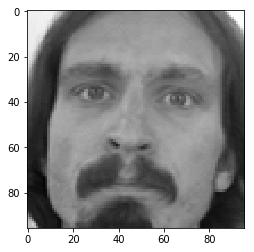

In [28]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

Now lets separate labels.

In [30]:
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

As our data is ready for training , lets define our model. I am using keras and simple dense layers. For loss function I am using 'mse' ( mean squared error ) as we have to predict new values. Our result evaluted on the basics of 'mae' ( mean absolute error ) .

In [34]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae','accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Now our model is defined and we will train it by calling fit method. I ran it for 500 iteration keeping batch size and validtion set size as 20% ( 20% of the training data will be kept for validating the model 

In [35]:
model.fit(X_train,y_train,epochs = 500,batch_size = 128,validation_split = 0.2)


Instructions for updating:
Use tf.cast instead.
Train on 5639 samples, validate on 1410 samples
Epoch 1/500
5639/5639 [==============================] - 3s 592us/step - loss: 14889.0844 - mean_absolute_error: 79.5663 - acc: 0.0615 - val_loss: 2710.1544 - val_mean_absolute_error: 48.5351 - val_acc: 0.3121
Epoch 2/500
5639/5639 [==============================] - 1s 181us/step - loss: 2740.8419 - mean_absolute_error: 47.2904 - acc: 0.2275 - val_loss: 2706.8140 - val_mean_absolute_error: 48.5024 - val_acc: 0.3099
Epoch 3/500
5639/5639 [==============================] - 1s 178us/step - loss: 2231.7080 - mean_absolute_error: 39.3850 - acc: 0.0553 - val_loss: 912.5085 - val_mean_absolute_error: 23.2841 - val_acc: 0.0000e+00
Epoch 4/500
5639/5639 [==============================] - 1s 178us/step - loss: 641.3604 - mean_absolute_error: 19.0818 - acc: 0.0599 - val_loss: 232.2889 - val_mean_absolute_error: 11.5039 - val_acc: 0.0773
Epoch 5/500
5639/5639 [==============================] - 1s 197us/

Epoch 79/500
5639/5639 [==============================] - 1s 233us/step - loss: 106.4484 - mean_absolute_error: 7.2138 - acc: 0.5840 - val_loss: 142.9810 - val_mean_absolute_error: 9.0381 - val_acc: 0.6773
Epoch 80/500
5639/5639 [==============================] - 1s 190us/step - loss: 105.7746 - mean_absolute_error: 7.2584 - acc: 0.5552 - val_loss: 112.2270 - val_mean_absolute_error: 7.7394 - val_acc: 0.6851
Epoch 81/500
5639/5639 [==============================] - 1s 191us/step - loss: 105.5491 - mean_absolute_error: 7.1812 - acc: 0.5826 - val_loss: 99.6693 - val_mean_absolute_error: 7.2824 - val_acc: 0.6830
Epoch 82/500
5639/5639 [==============================] - 1s 211us/step - loss: 111.7639 - mean_absolute_error: 7.3903 - acc: 0.5577 - val_loss: 111.9711 - val_mean_absolute_error: 7.8815 - val_acc: 0.5496
Epoch 83/500
5639/5639 [==============================] - 1s 199us/step - loss: 136.9414 - mean_absolute_error: 8.3326 - acc: 0.4980 - val_loss: 159.9084 - val_mean_absolute_err

Epoch 119/500
5639/5639 [==============================] - 1s 189us/step - loss: 92.1074 - mean_absolute_error: 6.8445 - acc: 0.5857 - val_loss: 105.9729 - val_mean_absolute_error: 7.5967 - val_acc: 0.6865
Epoch 120/500
5639/5639 [==============================] - 1s 187us/step - loss: 90.9296 - mean_absolute_error: 6.7046 - acc: 0.5884 - val_loss: 114.1504 - val_mean_absolute_error: 7.8669 - val_acc: 0.6865
Epoch 121/500
5639/5639 [==============================] - 1s 184us/step - loss: 96.6019 - mean_absolute_error: 6.9691 - acc: 0.5882 - val_loss: 125.9701 - val_mean_absolute_error: 8.5580 - val_acc: 0.6440
Epoch 122/500
5639/5639 [==============================] - 1s 217us/step - loss: 91.7599 - mean_absolute_error: 6.7499 - acc: 0.5735 - val_loss: 87.0516 - val_mean_absolute_error: 6.7725 - val_acc: 0.6865
Epoch 123/500
5639/5639 [==============================] - 1s 194us/step - loss: 92.1972 - mean_absolute_error: 6.8124 - acc: 0.5785 - val_loss: 88.7214 - val_mean_absolute_erro

Epoch 159/500
5639/5639 [==============================] - 1s 190us/step - loss: 81.5824 - mean_absolute_error: 6.5930 - acc: 0.5751 - val_loss: 77.1692 - val_mean_absolute_error: 6.3350 - val_acc: 0.6865
Epoch 160/500
5639/5639 [==============================] - 1s 197us/step - loss: 72.8579 - mean_absolute_error: 6.1794 - acc: 0.5872 - val_loss: 79.2532 - val_mean_absolute_error: 6.4211 - val_acc: 0.6865
Epoch 161/500
5639/5639 [==============================] - 1s 185us/step - loss: 68.7010 - mean_absolute_error: 5.9910 - acc: 0.5944 - val_loss: 81.6603 - val_mean_absolute_error: 6.5478 - val_acc: 0.6858
Epoch 162/500
5639/5639 [==============================] - 1s 186us/step - loss: 74.4981 - mean_absolute_error: 6.2392 - acc: 0.5886 - val_loss: 92.8958 - val_mean_absolute_error: 7.0290 - val_acc: 0.6837
Epoch 163/500
5639/5639 [==============================] - 1s 180us/step - loss: 72.0972 - mean_absolute_error: 6.1739 - acc: 0.5765 - val_loss: 74.7501 - val_mean_absolute_error: 

Epoch 199/500
5639/5639 [==============================] - 1s 163us/step - loss: 55.4529 - mean_absolute_error: 5.4702 - acc: 0.5382 - val_loss: 82.7432 - val_mean_absolute_error: 6.6381 - val_acc: 0.4816
Epoch 200/500
5639/5639 [==============================] - 1s 166us/step - loss: 60.6260 - mean_absolute_error: 5.7039 - acc: 0.5533 - val_loss: 104.2245 - val_mean_absolute_error: 7.9148 - val_acc: 0.6348
Epoch 201/500
5639/5639 [==============================] - 1s 161us/step - loss: 51.6106 - mean_absolute_error: 5.2366 - acc: 0.5682 - val_loss: 64.3460 - val_mean_absolute_error: 5.8636 - val_acc: 0.6823
Epoch 202/500
5639/5639 [==============================] - 1s 162us/step - loss: 63.8105 - mean_absolute_error: 5.7958 - acc: 0.5474 - val_loss: 65.9332 - val_mean_absolute_error: 5.9274 - val_acc: 0.4340
Epoch 203/500
5639/5639 [==============================] - 1s 170us/step - loss: 53.8927 - mean_absolute_error: 5.3816 - acc: 0.5583 - val_loss: 59.6256 - val_mean_absolute_error:

Epoch 239/500
5639/5639 [==============================] - 1s 187us/step - loss: 41.2267 - mean_absolute_error: 4.5092 - acc: 0.6063 - val_loss: 84.5913 - val_mean_absolute_error: 6.8436 - val_acc: 0.6865
Epoch 240/500
5639/5639 [==============================] - 1s 203us/step - loss: 52.5116 - mean_absolute_error: 5.1836 - acc: 0.6049 - val_loss: 52.0083 - val_mean_absolute_error: 5.0857 - val_acc: 0.6816
Epoch 241/500
5639/5639 [==============================] - 1s 228us/step - loss: 39.5744 - mean_absolute_error: 4.4165 - acc: 0.5886 - val_loss: 101.7198 - val_mean_absolute_error: 7.9280 - val_acc: 0.6865
Epoch 242/500
5639/5639 [==============================] - 2s 280us/step - loss: 41.1381 - mean_absolute_error: 4.5255 - acc: 0.6047 - val_loss: 51.5789 - val_mean_absolute_error: 5.0899 - val_acc: 0.6837
Epoch 243/500
5639/5639 [==============================] - 1s 211us/step - loss: 39.2113 - mean_absolute_error: 4.4155 - acc: 0.5992 - val_loss: 54.0340 - val_mean_absolute_error:

Epoch 279/500
5639/5639 [==============================] - 1s 195us/step - loss: 33.7793 - mean_absolute_error: 4.1238 - acc: 0.6049 - val_loss: 34.9543 - val_mean_absolute_error: 4.1306 - val_acc: 0.6865
Epoch 280/500
5639/5639 [==============================] - 1s 203us/step - loss: 29.5306 - mean_absolute_error: 3.8129 - acc: 0.6040 - val_loss: 55.4609 - val_mean_absolute_error: 5.4129 - val_acc: 0.6858
Epoch 281/500
5639/5639 [==============================] - 1s 181us/step - loss: 28.1561 - mean_absolute_error: 3.7032 - acc: 0.6019 - val_loss: 55.0314 - val_mean_absolute_error: 5.3696 - val_acc: 0.6844
Epoch 282/500
5639/5639 [==============================] - 1s 187us/step - loss: 28.3617 - mean_absolute_error: 3.7118 - acc: 0.6049 - val_loss: 33.7836 - val_mean_absolute_error: 4.0304 - val_acc: 0.6865
Epoch 283/500
5639/5639 [==============================] - 1s 196us/step - loss: 28.5223 - mean_absolute_error: 3.7405 - acc: 0.6019 - val_loss: 55.5758 - val_mean_absolute_error: 

Epoch 319/500
5639/5639 [==============================] - 1s 161us/step - loss: 17.8661 - mean_absolute_error: 2.8887 - acc: 0.6052 - val_loss: 26.5345 - val_mean_absolute_error: 3.4635 - val_acc: 0.6858
Epoch 320/500
5639/5639 [==============================] - 1s 161us/step - loss: 17.6643 - mean_absolute_error: 2.8537 - acc: 0.5921 - val_loss: 20.2043 - val_mean_absolute_error: 2.9293 - val_acc: 0.6865
Epoch 321/500
5639/5639 [==============================] - 1s 160us/step - loss: 17.3313 - mean_absolute_error: 2.8357 - acc: 0.6035 - val_loss: 36.4432 - val_mean_absolute_error: 4.2654 - val_acc: 0.6858
Epoch 322/500
5639/5639 [==============================] - 1s 161us/step - loss: 17.5341 - mean_absolute_error: 2.8530 - acc: 0.6054 - val_loss: 21.2925 - val_mean_absolute_error: 2.9900 - val_acc: 0.6858
Epoch 323/500
5639/5639 [==============================] - 1s 161us/step - loss: 17.2790 - mean_absolute_error: 2.8282 - acc: 0.6042 - val_loss: 24.8617 - val_mean_absolute_error: 

Epoch 359/500
5639/5639 [==============================] - 1s 223us/step - loss: 10.9972 - mean_absolute_error: 2.2009 - acc: 0.6035 - val_loss: 9.9505 - val_mean_absolute_error: 1.9892 - val_acc: 0.6872
Epoch 360/500
5639/5639 [==============================] - 1s 214us/step - loss: 10.8120 - mean_absolute_error: 2.1859 - acc: 0.6045 - val_loss: 14.6728 - val_mean_absolute_error: 2.6060 - val_acc: 0.6865
Epoch 361/500
5639/5639 [==============================] - 1s 246us/step - loss: 11.1704 - mean_absolute_error: 2.2313 - acc: 0.5905 - val_loss: 9.3596 - val_mean_absolute_error: 1.9530 - val_acc: 0.6610
Epoch 362/500
5639/5639 [==============================] - 1s 242us/step - loss: 10.8963 - mean_absolute_error: 2.1975 - acc: 0.5863 - val_loss: 8.4227 - val_mean_absolute_error: 1.7340 - val_acc: 0.6858
Epoch 363/500
5639/5639 [==============================] - 1s 251us/step - loss: 10.6442 - mean_absolute_error: 2.1496 - acc: 0.6021 - val_loss: 8.4065 - val_mean_absolute_error: 1.75

5639/5639 [==============================] - 1s 218us/step - loss: 10.0654 - mean_absolute_error: 2.0172 - acc: 0.6052 - val_loss: 6.2093 - val_mean_absolute_error: 1.4766 - val_acc: 0.6865
Epoch 440/500
5639/5639 [==============================] - 1s 186us/step - loss: 10.0710 - mean_absolute_error: 2.0219 - acc: 0.6052 - val_loss: 6.0192 - val_mean_absolute_error: 1.4291 - val_acc: 0.6865
Epoch 441/500
5639/5639 [==============================] - 1s 187us/step - loss: 10.0621 - mean_absolute_error: 2.0273 - acc: 0.6052 - val_loss: 6.0185 - val_mean_absolute_error: 1.4314 - val_acc: 0.6865
Epoch 442/500
5639/5639 [==============================] - 1s 187us/step - loss: 10.0617 - mean_absolute_error: 2.0202 - acc: 0.6052 - val_loss: 6.1686 - val_mean_absolute_error: 1.4810 - val_acc: 0.6865
Epoch 443/500
5639/5639 [==============================] - 1s 185us/step - loss: 10.0648 - mean_absolute_error: 2.0305 - acc: 0.6052 - val_loss: 6.0418 - val_mean_absolute_error: 1.4291 - val_acc: 0

Now lets prepare our testing data

In [36]:
#preparing test data
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

Reshaping and converting

In [37]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96)

Lets see first image in out test data

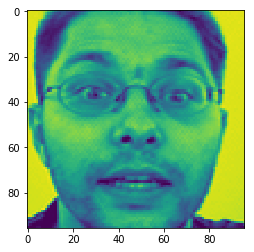

In [38]:
plt.imshow(X_test[0])
plt.show()

In [39]:
pred = model.predict(X_test)

Now the last step is the create our submission file keeping in the mind required format. There should be two columns :- RowId and Location Location column values should be filled according the lookup table provided ( IdLookupTable.csv)

In [40]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [41]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [42]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [43]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [44]:
rowid = pd.Series(rowid,name = 'RowId')

In [45]:
loc = pd.Series(preded,name = 'Location')

In [48]:
submission = pd.concat([rowid,loc],axis = 1)
submission.head()

,RowId,Location
0,1,66.175117
1,2,37.468941
2,3,30.027555
3,4,37.802212
4,5,59.114162


In [47]:
submission.to_csv('face_key_detection_submission.csv',index = False)

Reference : https://www.kaggle.com/karanjakhar/facial-keypoint-detection